# Données telecom

Il s'agit d'un jeu de données rassemblant des clients d'un opérateur de télécommunication. 

Pour chaque individu, les colonnes sont renseignées avec un mélange de données quantitatives et qualitatives. 

La variable cible est churn qui indique si le client a quitté son opérateur.
    
![](Jedh.jpeg)

Le fichier de donnée est disponible :
https://www.kaggle.com/datasets/spscientist/telecom-data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:

churn=pd.read_csv("telecom_churn.csv")
churn.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
churn["area code"]

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area code, Length: 3333, dtype: int64

In [22]:
churn["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [3]:
churn.shape

(3333, 21)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
churn.describe(include="object")

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


In [6]:
encoder = LabelEncoder()
churn["churn"] = encoder.fit_transform(churn["churn"])

In [7]:
dict_label_encode={}
for col in churn.columns:
    if churn[col].dtype == object:
        dict_label_encode[col]=LabelEncoder()
        churn[col]=dict_label_encode[col].fit_transform(churn[col])

In [8]:
encoder_area=OneHotEncoder(sparse_output=False,categories="auto")

area=encoder_area.fit_transform(np.array(churn["area code"]).reshape(-1, 1))

churn_clean=pd.concat([churn, pd.DataFrame(area,
                                           columns=encoder_area.categories_,
                                           index=churn.index)], axis=1)

churn_clean.drop("area code", axis=1, inplace=True)

In [9]:
churn_clean

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,"(408,)","(415,)","(510,)"
0,16,128,1926,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,0.0,1.0,0.0
1,35,107,1575,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
2,31,137,1117,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
3,35,84,1707,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
4,36,75,110,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,3057,0,1,36,156.2,77,26.55,215.5,...,83,12.56,9.9,6,2.67,2,0,0.0,1.0,0.0
3329,49,68,1528,0,0,0,231.1,57,39.29,153.4,...,123,8.61,9.6,4,2.59,3,0,0.0,1.0,0.0
3330,39,28,42,0,0,0,180.8,109,30.74,288.8,...,91,8.64,14.1,6,3.81,2,0,0.0,0.0,1.0
3331,6,184,1331,1,0,0,213.8,105,36.35,159.6,...,137,6.26,5.0,10,1.35,2,0,0.0,0.0,1.0


In [10]:
churn_clean[["international plan", "voice mail plan", "churn"]]

,international plan,voice mail plan,churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
3328,0,1,0
3329,0,0,0
3330,0,0,0
3331,1,0,0


In [11]:
churn_clean.columns

Index([                 'state',         'account length',
                 'phone number',     'international plan',
              'voice mail plan',  'number vmail messages',
            'total day minutes',        'total day calls',
             'total day charge',      'total eve minutes',
              'total eve calls',       'total eve charge',
          'total night minutes',      'total night calls',
           'total night charge',     'total intl minutes',
             'total intl calls',      'total intl charge',
       'customer service calls',                  'churn',
                         (408,),                   (415,),
                         (510,)],
      dtype='object')

In [12]:
numeric_features = [ 'number vmail messages','total day minutes', 
                    'total day calls', 'total day charge',
                    'total eve minutes', 'total eve calls', 
                    'total eve charge', 'total night minutes', 
                    'total night calls','total night charge', 
                    'total intl minutes', 'total intl calls',
                    'total intl charge','customer service calls']

numeric_transformer = StandardScaler()

categorical_features = ['area code', 
                        "international plan",
                        'voice mail plan']

categorical_transformer = OneHotEncoder(handle_unknown='ignore',
                                        categories='auto',)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
)

In [13]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['number vmail messages', 'total day minutes',
                                  'total day calls', 'total day charge',
                                  'total eve minutes', 'total eve calls',
                                  'total eve charge', 'total night minutes',
                                  'total night calls', 'total night charge',
                                  'total intl minutes', 'total intl calls',
                                  'total intl charge',
                                  'customer service calls']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['area code', 'international plan',
                                  'voice mail plan'])])

In [14]:
churn_clean = preprocessor.fit_transform(churn)

In [15]:
x = churn_clean
y = churn["churn"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3,
                                                    stratify = y)
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

0    0.855
1    0.145
Name: churn, dtype: float64

In [60]:
y_train.value_counts(normalize=True)

0    0.855122
1    0.144878
Name: churn, dtype: float64

In [61]:
modele_rf=RandomForestClassifier()
modele_knn=KNeighborsClassifier()

In [62]:
modele_rf.fit(x_train,y_train)
modele_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
modele_rf.feature_importances_

array([0.02743438, 0.13481593, 0.0358953 , 0.13099789, 0.0714911 ,
       0.03171577, 0.06911226, 0.03909375, 0.03209293, 0.04022083,
       0.0511666 , 0.0557025 , 0.04419163, 0.11761178, 0.00463019,
       0.00476799, 0.00472936, 0.04228941, 0.03565688, 0.01330721,
       0.01307632])

In [64]:
y_predict_rf = modele_rf.predict(x_test)
y_predict_knn = modele_knn.predict(x_test)

In [69]:
accuracy_modele_rf=accuracy_score(y_test,y_predict_rf)
accuracy_modele_knn=accuracy_score(y_test,y_predict_knn)
print("Pourcentage de bien classés pour le modèle RF :",accuracy_modele_rf)
print("Pourcentage de bien classés pour le modèle kNN :",accuracy_modele_knn)

Pourcentage de bien classés pour le modèle RF : 0.961
Pourcentage de bien classés pour le modèle kNN : 0.89


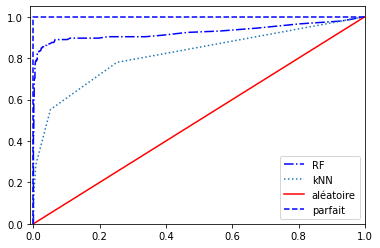

In [70]:
proba_rf= modele_rf.predict_proba(x_test)[:,1]
proba_knn=modele_knn.predict_proba(x_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, proba_rf)
plt.plot(fpr,tpr,"b-.", label="RF")

fpr, tpr, _ = roc_curve(y_test, proba_knn)
plt.plot(fpr,tpr,":", label="kNN")

plt.plot([0, 1], [0, 1],"r-", label="aléatoire", )

plt.plot([0,0, 1], [0,1, 1], 'b--', label="parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

In [71]:
auc_modele_rf=roc_auc_score(y_test, modele_rf.predict_proba(x_test)[:,1])
auc_modele_knn=roc_auc_score(y_test,modele_knn.predict_proba(x_test)[:,1])

print("Aire sous la courbe ROC pour le modèle RF :" ,auc_modele_rf)
print("Aire sous la courbe ROC pour le modèle kNN :" ,auc_modele_knn)

Aire sous la courbe ROC pour le modèle RF : 0.9264529138939301
Aire sous la courbe ROC pour le modèle kNN : 0.818927203065134


In [72]:
dico_param= {"max_depth":[3,5,7,10], "n_estimators":[10,20,50,100]}

In [73]:
recherche_hyper = GridSearchCV(RandomForestClassifier(), 
                               dico_param, 
                               scoring="accuracy",cv=5)

In [74]:
recherche_hyper.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='accuracy')

In [75]:
dico_param_rf={"n_estimators":[10,100,1000],"max_depth":[5,7,9]}
dico_param_knn={"n_neighbors":[2,5,10,50],"weights":['uniform','distance']}

modele_grid_rf=GridSearchCV(modele_rf,dico_param_rf,
                            scoring="roc_auc",cv=5)

modele_grid_knn=GridSearchCV(modele_knn, dico_param_knn,
                             scoring="roc_auc",cv=5)

In [76]:
modele_grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [10, 100, 1000]},
             scoring='roc_auc')

In [77]:
modele_grid_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 50],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [78]:
print("Meilleurs paramètres RF:", modele_grid_rf.best_params_)
print("AUC - RF:", modele_grid_rf.best_score_)
print("Meilleurs paramètres kNN:", modele_grid_knn.best_params_)
print("AUC - kNN:", modele_grid_knn.best_score_)

Meilleurs paramètres RF: {'max_depth': 7, 'n_estimators': 1000}
AUC - RF: 0.9079735114784327
Meilleurs paramètres kNN: {'n_neighbors': 50, 'weights': 'distance'}
AUC - kNN: 0.8578715225288859
